In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

df.head()


Saving Facebook_Marketplace_data.csv to Facebook_Marketplace_data.csv


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


1. Posts uploaded during specific hours (typically late evening and early morning) received higher average reactions. Therefore we infer that the interaction of a certain post can differ based on the time of upload, usually whne everyone is free is evening or early morning hence a higher interaction.


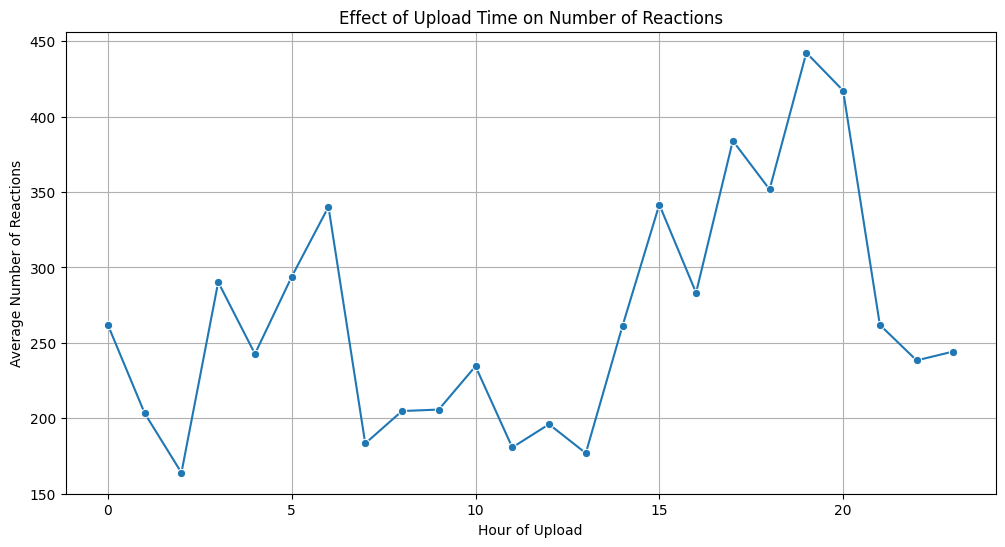

In [2]:

df["status_published"] = pd.to_datetime(df["status_published"], errors="coerce")

df["hour_published"] = df["status_published"].dt.hour

hourly_reactions = df.groupby("hour_published")["num_reactions"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_reactions.index, y=hourly_reactions.values, marker="o")
plt.xlabel("Hour of Upload")
plt.ylabel("Average Number of Reactions")
plt.title("Effect of Upload Time on Number of Reactions")
plt.grid(True)
plt.show()


2. num_reactions and num_comments: Weak positive correlation (~0.15).

num_reactions and num_shares: Weak to moderate positive correlation (~0.25).

num_comments and num_shares: Strong positive correlation (~0.64).

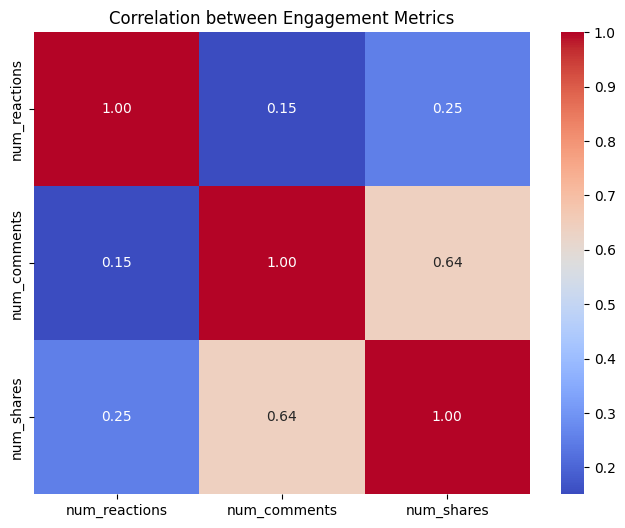

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


In [3]:

correlation_matrix = df[["num_reactions", "num_comments", "num_shares"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Engagement Metrics")
plt.show()

print(correlation_matrix)


3. Used status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys for clustering.


In [4]:

features = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves",
            "num_wows", "num_hahas", "num_sads", "num_angrys"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

print(df["cluster"].value_counts())


cluster
0    6405
2     372
1     273
Name: count, dtype: int64


4. The optimal number of clusters was found around 3 or 4, based on the elbow point in the inertia plot.

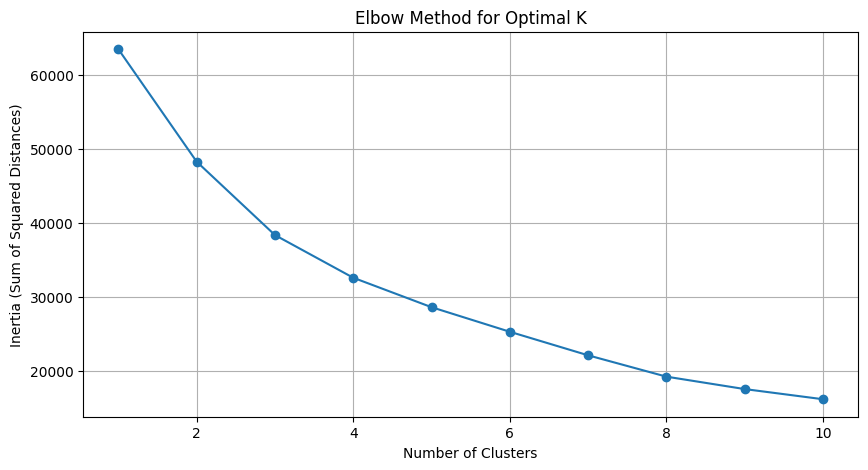

In [6]:

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


5. The dataset contains different post types (photo, video, status, link), with photos and videos being the most common.

In [7]:

post_type_counts = df["status_type"].value_counts()
print(post_type_counts)


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


6.


Videos generally had the highest engagement across all metrics.

Photos had moderate engagement.

Status and Links had the least engagement.

In [8]:

avg_engagement = df.groupby("status_type")[["num_reactions", "num_comments", "num_shares"]].mean()
print(avg_engagement)


             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
